## Birds Classifier

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

In [58]:
MAX_SPECIES = 100

### Exploring Images

In [59]:
path = 'data/200_species_test/AMERICAN COOT/5.jpg'

**Original Image**

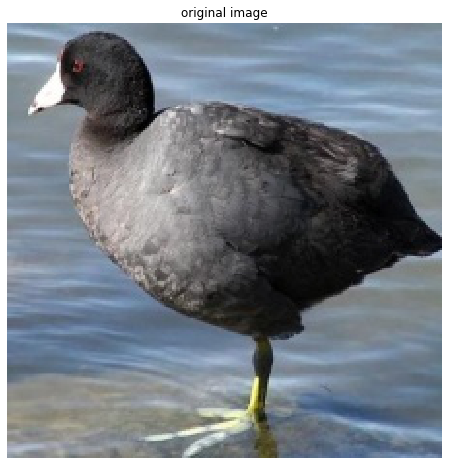

In [60]:
plt.figure(1,figsize=(12,8))
img = mpimg.imread(path)
plt.imshow(img)
plt.title('original image');
plt.axis('off');

Original size:

In [61]:
img.shape

(224, 224, 3)

**Gray Scale**

In [62]:
im = Image.open(path)
image_gr = im.convert("L")
arr = np.asarray(image_gr) 

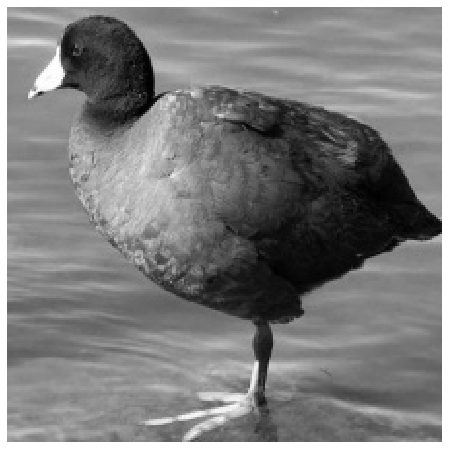

In [63]:
plt.figure(1,figsize=(12,8))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
plt.axis('off');

Shape of gray scaled image:

In [64]:
arr.shape

(224, 224)

In [65]:
image_size = arr.size

In [66]:
image_size

50176

### Load Training Set

Each Image is transformed to Grayscale

In [67]:
train_path = 'data/200_species_train'

In [68]:
def load_dataset(data_path, max_species=100, shuffled=True, grayscale=True): 
    data_images = []
    data_labels = []
    for num_species, specie in enumerate(os.listdir(data_path)):
        images_path = os.path.join(data_path,specie)
        for i in os.listdir(images_path):
            image_path = os.path.join(images_path,i)
            im = Image.open(image_path)
            if grayscale:
                im = im.convert("L")
            arr = np.asarray(im)
            arr = arr.flatten()
            data_images.append(arr)
            data_labels.append(specie)
        if num_species == max_species-1:
            break
    data_images = np.array(data_images)
    data_labels = np.array(data_labels)
    X = pd.DataFrame(data_images)
    y = pd.Series(data_labels)
    if shuffled:
        X, y = shuffle(X, y)
        X.reset_index(drop=True)
        y.reset_index(drop=True)
    return X, y

We need to shuffle so we won't have the species in order

In [69]:
X_train, y_train = load_dataset(train_path, max_species=MAX_SPECIES)

In [70]:
y_train.head()

12394                    SORA
13283          AMERICAN PIPIT
7346                CASSOWARY
8064         CHIPPING SPARROW
5856     MALACHITE KINGFISHER
dtype: object

In [71]:
y_train.size

14048

In [72]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
12394,3,3,3,3,3,5,4,3,5,6,...,8,8,8,10,10,10,9,9,9,9
13283,205,205,205,205,205,205,205,205,205,205,...,151,153,131,171,167,138,83,98,119,103
7346,89,87,83,77,70,64,65,72,79,87,...,61,64,71,82,80,75,71,73,70,78
8064,192,190,190,190,190,191,192,191,190,190,...,150,97,101,143,151,154,148,154,153,152
5856,105,109,107,109,108,108,105,108,109,109,...,126,125,125,124,123,124,125,124,121,119


In [73]:
X_train.shape

(14048, 50176)

### Loading Validation Set

Each Image is transformed to Grayscale

In [74]:
validation_path = 'data/200_species_valid/'

In [75]:
X_val, y_val = load_dataset(validation_path, max_species=MAX_SPECIES)

In [76]:
X_val.shape

(500, 50176)

In [77]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
108,143,143,140,136,131,126,122,119,116,115,...,110,106,103,103,100,102,105,108,110,108
159,120,120,119,118,117,118,118,118,116,117,...,214,198,160,169,192,221,209,228,238,231
50,111,111,111,111,111,111,111,111,112,112,...,102,102,102,102,103,103,103,102,102,101
161,94,94,93,93,93,92,92,92,93,93,...,102,101,103,102,102,104,109,113,118,121
6,187,187,187,187,187,187,188,189,194,195,...,27,26,28,32,29,25,25,25,23,23


In [78]:
y_val.size

500

In [79]:
y_val.head()

108        TRUMPTER SWAN
159               PUFFIN
50     ANNAS HUMMINGBIRD
161      NORTHERN PARULA
6              WOOD DUCK
dtype: object

In [80]:
pd.set_option('max_rows', None)

### Species Count And Proportion:

In [81]:
y_train.value_counts().sort_values(ascending=False)

SORA                        300
D-ARNAUDS BARBET            233
WOOD DUCK                   214
CASPIAN TERN                213
VIOLET GREEN SWALLOW        201
NORTHERN PARULA             196
SPOONBILL                   192
AMERICAN PIPIT              179
FLAME TANAGER               177
GOLDEN CHEEKED WARBLER      176
PARADISE TANAGER            176
GLOSSY IBIS                 175
SHOEBILL                    175
BLACK-THROATED SPARROW      168
RED FACED WARBLER           167
STRAWBERRY FINCH            167
COCKATOO                    166
TOWNSENDS WARBLER           165
ALEXANDRINE PARAKEET        165
PAINTED BUNTIG              163
MALACHITE KINGFISHER        163
SNOWY OWL                   161
BEARDED BARBET              160
BALD EAGLE                  160
AMERICAN COOT               158
GREEN JAY                   156
TURQUOISE MOTMOT            156
NORTHERN JACANA             156
EURASIAN MAGPIE             155
VERMILION FLYCATHER         155
RING-BILLED GULL            153
WHITE CH

In [82]:
y_train.value_counts(normalize=True).sort_values(ascending=False)

SORA                        0.021355
D-ARNAUDS BARBET            0.016586
WOOD DUCK                   0.015233
CASPIAN TERN                0.015162
VIOLET GREEN SWALLOW        0.014308
NORTHERN PARULA             0.013952
SPOONBILL                   0.013667
AMERICAN PIPIT              0.012742
FLAME TANAGER               0.012600
GOLDEN CHEEKED WARBLER      0.012528
PARADISE TANAGER            0.012528
GLOSSY IBIS                 0.012457
SHOEBILL                    0.012457
BLACK-THROATED SPARROW      0.011959
RED FACED WARBLER           0.011888
STRAWBERRY FINCH            0.011888
COCKATOO                    0.011817
TOWNSENDS WARBLER           0.011745
ALEXANDRINE PARAKEET        0.011745
PAINTED BUNTIG              0.011603
MALACHITE KINGFISHER        0.011603
SNOWY OWL                   0.011461
BEARDED BARBET              0.011390
BALD EAGLE                  0.011390
AMERICAN COOT               0.011247
GREEN JAY                   0.011105
TURQUOISE MOTMOT            0.011105
N

We can see some imbalance

### Baseline Modeling: 101 Species

#### Random Forest Classifier

Before balancing:

In [23]:
rfc = RandomForestClassifier(min_samples_split=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
pred_val = rfc.predict(X_val)

In [25]:
print(classification_report(y_val, pred_val))

                          precision    recall  f1-score   support

       AFRICAN FIREFINCH       0.17      0.40      0.24         5
               ALBATROSS       1.00      0.20      0.33         5
    ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
           AMERICAN COOT       0.29      0.40      0.33         5
          AMERICAN PIPIT       0.05      0.20      0.08         5
       ANNAS HUMMINGBIRD       0.22      0.40      0.29         5
              BALD EAGLE       0.20      0.40      0.27         5
        BALTIMORE ORIOLE       0.00      0.00      0.00         5
            BARN SWALLOW       0.00      0.00      0.00         5
          BEARDED BARBET       0.33      0.40      0.36         5
       BELTED KINGFISHER       0.40      0.40      0.40         5
        BIRD OF PARADISE       0.00      0.00      0.00         5
  BLACK-CAPPED CHICKADEE       0.60      0.60      0.60         5
      BLACK-NECKED GREBE       1.00      0.40      0.57         5
  BLACK-T

/home/amit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A lot of species didn't get classified at all

In [27]:
rfc_2 = RandomForestClassifier(min_samples_split=2,max_depth=10)
rfc_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
pred_val_2 = rfc_2.predict(X_val)
print(classification_report(y_val, pred_val_2))

                          precision    recall  f1-score   support

       AFRICAN FIREFINCH       0.00      0.00      0.00         5
               ALBATROSS       1.00      0.20      0.33         5
    ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
           AMERICAN COOT       0.40      0.40      0.40         5
          AMERICAN PIPIT       0.00      0.00      0.00         5
       ANNAS HUMMINGBIRD       0.00      0.00      0.00         5
              BALD EAGLE       0.17      0.20      0.18         5
        BALTIMORE ORIOLE       0.00      0.00      0.00         5
            BARN SWALLOW       0.00      0.00      0.00         5
          BEARDED BARBET       0.07      0.20      0.11         5
       BELTED KINGFISHER       1.00      0.40      0.57         5
        BIRD OF PARADISE       0.00      0.00      0.00         5
  BLACK-CAPPED CHICKADEE       0.75      0.60      0.67         5
      BLACK-NECKED GREBE       0.00      0.00      0.00         5
  BLACK-T

/home/amit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Class weight to balance classes:

In [29]:
rfc_3 = RandomForestClassifier(min_samples_split=2,criterion='entropy', class_weight='balanced',max_depth=12)
rfc_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
pred_val_3 = rfc_3.predict(X_val)
print(classification_report(y_val, pred_val_3))

                          precision    recall  f1-score   support

       AFRICAN FIREFINCH       0.00      0.00      0.00         5
               ALBATROSS       0.33      0.20      0.25         5
    ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
           AMERICAN COOT       0.25      0.40      0.31         5
          AMERICAN PIPIT       0.00      0.00      0.00         5
       ANNAS HUMMINGBIRD       0.50      0.20      0.29         5
              BALD EAGLE       0.00      0.00      0.00         5
        BALTIMORE ORIOLE       0.00      0.00      0.00         5
            BARN SWALLOW       0.00      0.00      0.00         5
          BEARDED BARBET       0.38      0.60      0.46         5
       BELTED KINGFISHER       0.29      0.40      0.33         5
        BIRD OF PARADISE       0.00      0.00      0.00         5
  BLACK-CAPPED CHICKADEE       0.17      0.20      0.18         5
      BLACK-NECKED GREBE       0.14      0.20      0.17         5
  BLACK-T

/home/amit/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Building Simple CNN - 10 Species

**Buiding a Sequential model with 1 convolution layer**

In [52]:
model = Sequential([
        Conv2D(32, kernel_size=3, activation='relu',input_shape=(224,224,1)),
        Flatten(), Dense(MAX_SPECIES, activation='softmax')
        ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense (Dense)                (None, 10)                15770890  
Total params: 15,771,210
Trainable params: 15,771,210
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_train_cnn = X_train.values/255
X_val_cnn = X_val.values/255

In [31]:
rows_train = X_train.shape[0]
rows_val = X_val.shape[0]
X_train_cnn = X_train_cnn.reshape(rows_train,224,-1).reshape(rows_train,224,224,1)
X_val_cnn = X_val_cnn.reshape(rows_val,224,-1).reshape(rows_val,224,224,1)

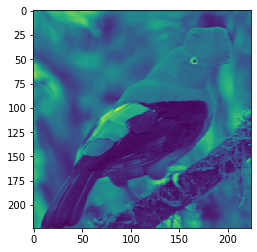

In [32]:
plt.imshow(X_train_cnn[2,:,:,0])
plt.show()

In [33]:
enc = LabelEncoder()
y_train_cnn = enc.fit_transform(y_train)
y_val_cnn = enc.transform(y_val)

In [34]:
y_train_cnn = to_categorical(y_train_cnn)
y_val_cnn = to_categorical(y_val_cnn)

In [35]:
y_train_cnn

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
y_train_cnn.shape

(1469, 10)

In [37]:
y_val_cnn.shape

(50, 10)

In [53]:
model.fit(X_train_cnn, y_train_cnn, batch_size=4,
          validation_data=(X_val_cnn, y_val_cnn), epochs=8, verbose=1,use_multiprocessing=True)

Epoch 1/8
368/368 [==============================] - 37s 100ms/step - loss: 5.8577 - accuracy: 0.3628 - val_loss: 1.5689 - val_accuracy: 0.4600
Epoch 2/8
368/368 [==============================] - 37s 99ms/step - loss: 0.3235 - accuracy: 0.9258 - val_loss: 1.1483 - val_accuracy: 0.5600
Epoch 3/8
368/368 [==============================] - 39s 105ms/step - loss: 0.0153 - accuracy: 0.9993 - val_loss: 1.3053 - val_accuracy: 0.6600
Epoch 4/8
368/368 [==============================] - 38s 103ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.3265 - val_accuracy: 0.6200
Epoch 5/8
368/368 [==============================] - 38s 102ms/step - loss: 4.5633e-04 - accuracy: 1.0000 - val_loss: 1.3762 - val_accuracy: 0.6200
Epoch 6/8
368/368 [==============================] - 38s 102ms/step - loss: 2.8532e-04 - accuracy: 1.0000 - val_loss: 1.4026 - val_accuracy: 0.6000
Epoch 7/8
368/368 [==============================] - 38s 104ms/step - loss: 2.0305e-04 - accuracy: 1.0000 - val_loss: 1.4057 - va

We can see much better accuracy even with simple network (comparing to other models with 10 species, not the above ones with 100 species)

In [54]:
model.fit(X_train_cnn, y_train_cnn, batch_size=4,
          validation_data=(X_val_cnn, y_val_cnn), epochs=8, verbose=1,use_multiprocessing=True)

Epoch 1/8
368/368 [==============================] - 37s 99ms/step - loss: 1.1780e-04 - accuracy: 1.0000 - val_loss: 1.3991 - val_accuracy: 0.5800
Epoch 2/8
368/368 [==============================] - 36s 99ms/step - loss: 9.2639e-05 - accuracy: 1.0000 - val_loss: 1.5018 - val_accuracy: 0.5400
Epoch 3/8
368/368 [==============================] - 38s 103ms/step - loss: 7.2885e-05 - accuracy: 1.0000 - val_loss: 1.4435 - val_accuracy: 0.5600
Epoch 4/8
368/368 [==============================] - 37s 100ms/step - loss: 5.9046e-05 - accuracy: 1.0000 - val_loss: 1.5008 - val_accuracy: 0.5600
Epoch 5/8
368/368 [==============================] - 37s 101ms/step - loss: 4.7619e-05 - accuracy: 1.0000 - val_loss: 1.4914 - val_accuracy: 0.5600
Epoch 6/8
368/368 [==============================] - 37s 100ms/step - loss: 3.8564e-05 - accuracy: 1.0000 - val_loss: 1.4872 - val_accuracy: 0.5200
Epoch 7/8
368/368 [==============================] - 38s 104ms/step - loss: 3.1447e-05 - accuracy: 1.0000 - val_lo

In [55]:
model.fit(X_train_cnn, y_train_cnn, batch_size=4,
          validation_data=(X_val_cnn, y_val_cnn), epochs=8, verbose=1,use_multiprocessing=True)

Epoch 1/8
368/368 [==============================] - 46s 124ms/step - loss: 2.0933e-05 - accuracy: 1.0000 - val_loss: 1.5615 - val_accuracy: 0.5000
Epoch 2/8
368/368 [==============================] - 46s 125ms/step - loss: 1.7062e-05 - accuracy: 1.0000 - val_loss: 1.6157 - val_accuracy: 0.5400
Epoch 3/8
368/368 [==============================] - 45s 123ms/step - loss: 1.4011e-05 - accuracy: 1.0000 - val_loss: 1.6114 - val_accuracy: 0.5200
Epoch 4/8
368/368 [==============================] - 45s 122ms/step - loss: 1.1517e-05 - accuracy: 1.0000 - val_loss: 1.5944 - val_accuracy: 0.5400
Epoch 5/8
368/368 [==============================] - 45s 121ms/step - loss: 9.4192e-06 - accuracy: 1.0000 - val_loss: 1.5947 - val_accuracy: 0.5600
Epoch 6/8
368/368 [==============================] - 45s 122ms/step - loss: 7.7660e-06 - accuracy: 1.0000 - val_loss: 1.6308 - val_accuracy: 0.6000
Epoch 7/8
368/368 [==============================] - 45s 123ms/step - loss: 6.4714e-06 - accuracy: 1.0000 - val_

In [56]:
model.fit(X_train_cnn, y_train_cnn, batch_size=4,
          validation_data=(X_val_cnn, y_val_cnn), epochs=10, verbose=1,use_multiprocessing=True)

Epoch 1/10
368/368 [==============================] - 38s 102ms/step - loss: 4.4264e-06 - accuracy: 1.0000 - val_loss: 1.6992 - val_accuracy: 0.5400
Epoch 2/10
368/368 [==============================] - 36s 99ms/step - loss: 3.6249e-06 - accuracy: 1.0000 - val_loss: 1.6658 - val_accuracy: 0.5800
Epoch 3/10
368/368 [==============================] - 36s 98ms/step - loss: 3.0238e-06 - accuracy: 1.0000 - val_loss: 1.7386 - val_accuracy: 0.5800
Epoch 4/10
368/368 [==============================] - 36s 99ms/step - loss: 2.4617e-06 - accuracy: 1.0000 - val_loss: 1.7518 - val_accuracy: 0.5800
Epoch 5/10
368/368 [==============================] - 36s 98ms/step - loss: 2.0867e-06 - accuracy: 1.0000 - val_loss: 1.7864 - val_accuracy: 0.5800
Epoch 6/10
368/368 [==============================] - 35s 96ms/step - loss: 1.7424e-06 - accuracy: 1.0000 - val_loss: 1.7999 - val_accuracy: 0.5600
Epoch 7/10
368/368 [==============================] - 37s 99ms/step - loss: 1.4520e-06 - accuracy: 1.0000 - val